O caixeiro viajante astronauta
========================================



## Introdução



O experimento que já vimos do caixeiro viajante é em duas dimensões. Agora, vamos imaginar que as cidades são como "estações espaciais", ou seja, possuem coordenadas em três dimensões. Nesse caso, nosso caixeiro viajante é um astronauta eu irá passar por todas as cidades, e queremos encontrar a ordem do trajeto que minimiza a distância percorrida.

## Objetivo



Encontrar o caminho de menor distância no problema do caixeiro viajante astronauta.

## Importações



In [1]:
import random
import matplotlib.pyplot as plt
from itertools import permutations
from funcoes import cria_cidades_espaciais as cria_cidades
from funcoes import populacao_inicial_cv
from funcoes import funcao_objetivo_cva as funcao_objetivo_individuo
from funcoes import funcao_objetivo_pop_cva
from funcoes import selecao_torneio_min
from funcoes import cruzamento_ordenado as funcao_cruzamento
from funcoes import mutacao_de_troca as funcao_mutacao

## Códigos e discussão



In [2]:
### CONSTANTES

# relacionadas à busca
TAMANHO_POP = 50
CHANCE_CRUZAMENTO = 0.5
CHANCE_MUTACAO = 0.05
NUM_COMBATENTES_NO_TORNEIO = 3
NUM_GERACOES = 100

# relacionadas ao problema a ser resolvido
CIDADES = cria_cidades(10)
NUM_GENES = len(CIDADES)
CIDADES

{'Cidade 0': (0.19254326109734654, 0.3452787664017479, 0.2390115722508942),
 'Cidade 1': (0.7738978029359059, 0.521627541989907, 0.6438456018482644),
 'Cidade 2': (0.20384403513837324, 0.9942969636746809, 0.09992247651946073),
 'Cidade 3': (0.08840002172233952, 0.5384370800997845, 0.7372922999745068),
 'Cidade 4': (0.23272986616385105, 0.3283973784856342, 0.055165562351465414),
 'Cidade 5': (0.3879805758006588, 0.1408550655239158, 0.5909115936063192),
 'Cidade 6': (0.7749285649747869, 0.38309195822526587, 0.9231715818761975),
 'Cidade 7': (0.9719706118453854, 0.9751020240343043, 0.2810153092200982),
 'Cidade 8': (0.25113920974557247, 0.09577690548693363, 0.15169704384678462),
 'Cidade 9': (0.7066653192568535, 0.7702496062231238, 0.5783808725744403)}

In [3]:
# funções locais (para não ter que colocar as variaveis locais no script
def cria_populacao_inicial(tamanho, nada):
    return populacao_inicial_cv(tamanho, CIDADES)

def funcao_objetivo_pop(populacao):
    return funcao_objetivo_pop_cva(populacao, CIDADES)

def funcao_selecao(populacao, fitness):
    return selecao_torneio_min(populacao, fitness, NUM_COMBATENTES_NO_TORNEIO)

In [4]:
# Busca por algoritmo genético

populacao = cria_populacao_inicial(TAMANHO_POP, NUM_GENES)

melhor_fitness_ja_visto = float("inf")  # é assim que escrevemos infinito em python

lista_melhor_fitness = []

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo_pop(populacao)
    populacao = funcao_selecao(populacao, fitness)
    
    # Cruzamento
    pais = populacao[0::2]
    maes = populacao[1::2]
    
    contador = 0
    
    for pai, mae in zip(pais, maes):
        if random.random() <= CHANCE_CRUZAMENTO:
            filho1, filho2 = funcao_cruzamento(pai, mae)
            populacao[contador] = filho1
            populacao[contador + 1] = filho2
        
        contador = contador + 2   
        
    # Mutação
    for n in range(len(populacao)):
        if random.random() <= CHANCE_MUTACAO:
            individuo = populacao[n]
            populacao[n] = funcao_mutacao(individuo)            
            
    # melhor individuo já visto até agora
    fitness = funcao_objetivo_pop(populacao)
    menor_fitness = min(fitness)
    if menor_fitness < melhor_fitness_ja_visto:        
        posicao = fitness.index(menor_fitness)
        melhor_individuo_ja_visto = populacao[posicao]
        melhor_fitness_ja_visto = menor_fitness    
    lista_melhor_fitness.append(melhor_fitness_ja_visto)

In [5]:
# Busca testando todas as permutações

melhor_fitness_ever = float("inf")

# testando todas as permutações possíveis
for caminho in permutations(list(CIDADES.keys())):
    distancia = funcao_objetivo_individuo(caminho, CIDADES)
    if distancia < melhor_fitness_ever:
        melhor_fitness_ever = distancia
        melhor_resposta_ever = caminho

In [6]:
# Checando os resultados

print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_ja_visto, "com distância:", melhor_fitness_ja_visto)

print()
print("Melhor individuo obtido por busca exaustiva:")
print(melhor_resposta_ever, "com distância:", melhor_fitness_ever)


Melhor individuo obtido por algoritmos genéticos:
['Cidade 3', 'Cidade 5', 'Cidade 6', 'Cidade 1', 'Cidade 9', 'Cidade 7', 'Cidade 2', 'Cidade 4', 'Cidade 8', 'Cidade 0'] com distância: 4.634326767389199

Melhor individuo obtido por busca exaustiva:
('Cidade 0', 'Cidade 4', 'Cidade 8', 'Cidade 5', 'Cidade 6', 'Cidade 1', 'Cidade 9', 'Cidade 7', 'Cidade 2', 'Cidade 3') com distância: 4.619908603160278


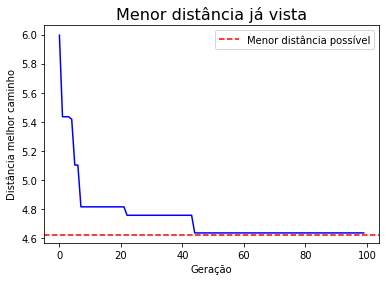

In [7]:
fig, ax = plt.subplots(1, 1)
ax.plot(range(NUM_GERACOES), lista_melhor_fitness, c="b")
ax.axhline(y=melhor_fitness_ever, c="r", linestyle="--", label="Menor distância possível")
ax.set_xlabel("Geração")
ax.set_ylabel("Distância melhor caminho")
ax.set_title("Menor distância já vista", fontsize=16)
ax.legend()

## Conclusão



Para resolver esse problema utilizei o mesmo algortitmo que o problema do caixeiro viajante, apenas modificando a função que cria cidades e a função objetivo. A nova função que cria cidades é igual a antiga exceto que ela gera posições da forma (x, y, z) ao invés de (x, y). Além disso, a função objetivo agora se utiliza da função de distância entre dois pontos em três dimensões ao invés de duas, ou seja:<br>
$$distância = \sqrt{x^2 + y^2 + z^2}$$ <br>
Fazendo essas modificações vemos que o algoritmo encontra o melhor caminho sem problemas, as mesmas conclusões do experimento do caixeiro viajente se aplicam a esse problema também.